# s03: Testing Distributions 

Knowing what distribution your data follow is important for knowing which statistical tests to apply to it. If you are using statistical tests that assume data to have a particular distribution, you need to test whether this is indeed the case.

As we saw previously, different statistical distributions have different 'shapes'. But just looking at the shape isn't enough for saying definitively what distribution the data follows. Here, we will explore some statistical tests for checking the distribution of data. 

<div class="alert alert-success">
By 'testing distributions' we mean statistical tests that evaluate whether observed data follow a particular distribution.
</div>

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest

In [2]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

## Evaluating a Normal Distribution

Here, we will focus on the most common case: testing whether a dataset is normally distributed. 

In [3]:
# Create a dataset of normally distributed data
d1 = stats.norm.rvs(size=100000)

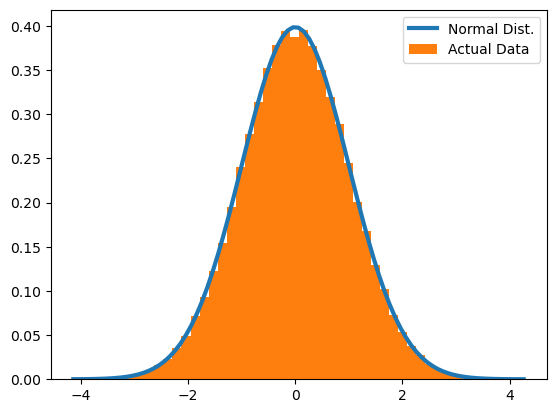

In [4]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, density=True, label='Actual Data');
plt.legend();

The plot above shows a histogram (in orange) of 'observed' data, and the expected distribution of the data, under the assumption of it being normally distributed. There seems to be a pretty good alignment! Now, let's asses this statistically. 

To do so, we will use the `normaltest` function, from scipy, which tests whether a sample of data differs from a what would be expected under a normal distribution. The null hypothesis is that the data come from a normal distribution. We can use `normaltest` to check this null, and to decide whether we should reject the null (to claim the data are not normal), or accept it. To assess this, the `normaltest` function compares the skew and kurtosis of the observed data to what would be expected if it's normally distributed. 

In [5]:
# Check the documentation for normaltest
normaltest?

In [6]:
# Run normal test on the data
stat, p_val = normaltest(d1)

In [7]:
# Check the p-value of the normaltest
print('\nNormaltest p-value is: {:1.2f} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 0.92 

We do not have evidence to reject the null hypothesis.


In this case, we do not reject the null, meaning we do not reject that this data is normally distributed. 

This statistical test is therefore consistent with the data being normally distributed. 

### Testing a non-Normal distribution

Let's test another dataset for normality.

For this example, we will explore case when visual inspection can be misleading, to emphasize the point that although visually inspecting datasets can give you a quick sense about whether they are normally distributed or not, this is not enough. Visual inspection can be somewhat misleading, since non-normally data can 'look normal'.

This is why, as well as visually checking data when it looks pretty normal, it is important to perform other checks.

For example, under some parameters, the Beta distributed data can look like it is normally distributed. 

In [8]:
# Generate some data from a beta distribution
d2 = stats.beta.rvs(7, 10, size=100000)

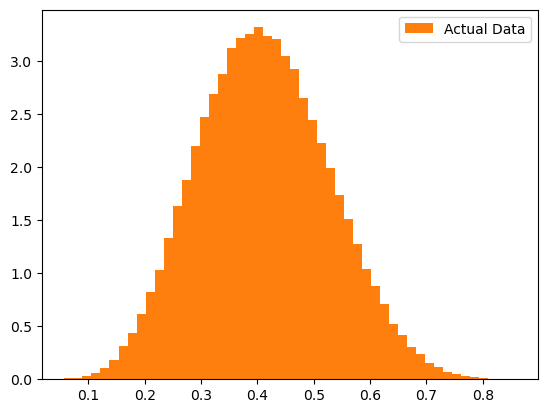

In [9]:
# Plot a histogram of the observed data
plt.hist(d2, 50, density=True, color='C1', label='Actual Data');
plt.legend();

This data, as plotted above, we might think looks quite normal, based on the visualization. 

However, there are more specific checks that we can do. 

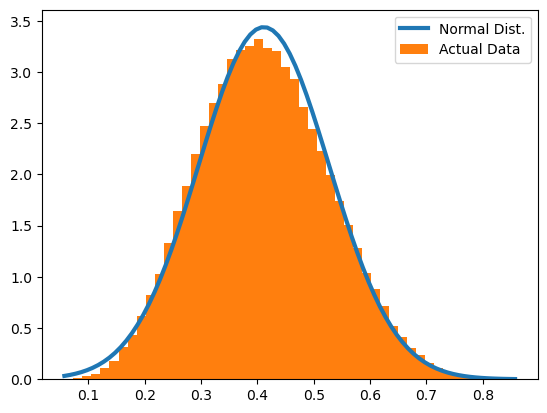

In [10]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
#  The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, density=True, label='Actual Data');
plt.legend();

In the above plot, we can see _some_ difference from the expected normal distribution. 

Overall, though, we might think it looks pretty normal, especially if examined without adding the probability density function. 

Let's check this statistically. 

In [11]:
# Run normal test on the data
stat, p_val = normaltest(d2)

In [12]:
# Check the p-value of the normaltest
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 3.92e-178 

We have evidence to reject the null hypothesis.


In this example, the plot is ambiguous, but 'normaltest' suggests these data are actually very unlikely to come from a normal distribution. 

We happen to know that this is indeed true, as the 'ground truth' of the data is that they were generated from a beta distribution.

Therefore, using this data in statistical tests that expect normally distributed inputs is invalid, since we have violated the assumptions upon which these tests are based. We will have to use different methods to perform statistical comparisons with these data.

## Evaluating Different Distributions

So far we have examined checking whether a dataset is normally distributed.

More generally, you can use the Kolmogorov-Smirnov test to check if a set of data has some other distribution (that you specify). 

This test is implemented in `scipy`, and you can explore using it. 

In [13]:
from scipy.stats import kstest

In [14]:
# Check out the documentation for kstest
kstest?

The `kstest` has a similar form to the `normaltest`, in that we can compare a sample of data to a specified distribution. 

The null hypothesis is that the data comes from the specified distribution. 

If we reject the null, we can conclude that the data do not conform to the tested distribution.

In [15]:
# Let's continue using our data from above, from the beta distribution. 
#   We can confirm kstest considers it not normally distributed  
stat, p_val = kstest(d2, 'norm')
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.56 
P-Value: 	0.00e+00

We have evidence to reject the null hypothesis.


In [16]:
# Now compare the data to the beta distribution.
#   Note that in this case, we have to specify some parameters for the beta 
#   distribution we are testing against, so we will use the simulation parameters
stat, p_val = kstest(d2, 'beta', [7, 10])
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.00 
P-Value: 	3.53e-01

We do not have evidence to reject the null hypothesis.


In this case, the data sample is consistent with being from a beta distribution!